In [14]:
import dill 
import torch 
import torch.nn as nn
import numpy as np
from four_room.shortest_path import find_all_action_values
from four_room.env import FourRoomsEnv
from four_room.wrappers import gym_wrapper
import numpy as np
import imageio
import gymnasium as gym
from four_room.utils import obs_to_state
from four_room.arch import CNN
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from hashlib import sha1

from regression.experiment import Experiment


import warnings
warnings.filterwarnings(action='once')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
gym.register('MiniGrid-FourRooms-v1', FourRoomsEnv)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\garga\Documents\Uni\four_room\venv\Lib\site-packages\gymnasium\envs\registration.py:694: UserWarning: WARN: Overriding environment MiniGrid-FourRooms-v1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Star Uniqueness: 0.5152145227718021
ExploreGo* Uniqueness: 0.40536542459619385
ExploreGo Uniqueness: 0.44885227545389106
Avoid (0.2) Uniqueness: 0.7999840019197696
RND V1 Uniqueness: 0.7704583633309335
RND V2 Uniqueness (note this is new config): 0.8777893305606654
RUNNING EXPERIMENT star_full1 ON DEVICE: cuda
=============Seed 0===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.575 | Hours left: 0.0ft: 0.0ours left: 0.0

=============Seed 1===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.500 | Hours left: 0.0ft: 0.0ours left: 0.0

=============Seed 2===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.600 | Hours left: 0.0ft: 0.0ours left: 0.0

Dataset: ExploreGo* 25K | Test results: 0.4250
Dataset: Star 25K | Test results: 0.5500
Dataset: Avoid 25K (Min Overlap 0.2) | Test results: 0.7783
Dataset: RND V1 | Test results: 0.5167
Dataset: ExploreGo 25K | Test res

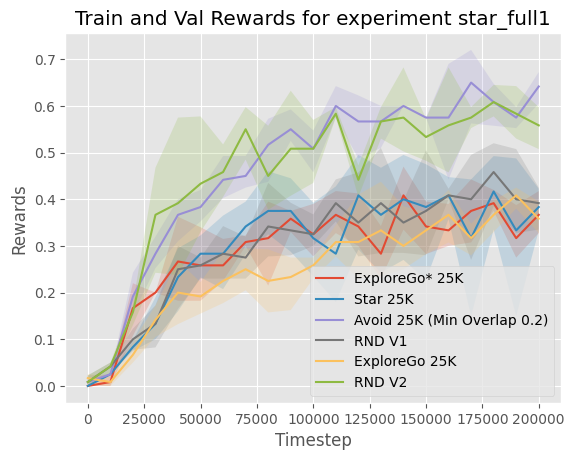

In [2]:
with open(f'action_values/star_25k.pl', 'rb') as file:
    star = dill.load(file)
    assert len(star) >= 25000
    print(f'Star Uniqueness: {star.ratio_unique_trans}')
    
with open(f'action_values/explorego_star_25k.pl', 'rb') as file:
    explore_go_star = dill.load(file)
    assert len(explore_go_star) >= 25000
    print(f'ExploreGo* Uniqueness: {explore_go_star.ratio_unique_trans}')
    
with open(f'action_values/explorego_25k.pl', 'rb') as file:
    explore = dill.load(file)
    assert len(explore) >= 25000
    print(f'ExploreGo Uniqueness: {explore.ratio_unique_trans}')
    
with open(f'action_values/avoid_25k_02.pl', 'rb') as file:
    avoid_02 = dill.load(file)
    assert len(avoid_02) >= 25000
    print(f'Avoid (0.2) Uniqueness: {avoid_02.ratio_unique_trans}')
    
with open(f'action_values/rnd_25k_v1.pl', 'rb') as file:
    rnd1 = dill.load(file)
    assert len(rnd1) >= 25000
    print(f'RND V1 Uniqueness: {rnd1.ratio_unique_trans}')
    
with open(f'action_values/rnd_25k_v2.pl', 'rb') as file:
    rnd2 = dill.load(file)
    assert len(rnd2) >= 25000, len(rnd2)
    print(f'RND V2 Uniqueness (note this is new config): {rnd2.ratio_unique_trans}')

avoid_vs_explorego = Experiment(
    'star_full1', 
    seeds=[0, 1, 2],
    timesteps=int(2e5), 
    val_freq=int(1e4),
    batch_size=64
)

avoid_vs_explorego.run_experiment([explore_go_star, star, avoid_02, rnd1, explore, rnd2], 
                               ['ExploreGo* 25K', 'Star 25K', 'Avoid 25K (Min Overlap 0.2)', 'RND V1', 'ExploreGo 25K', 'RND V2'])


Star Uniqueness: 0.38359560896602746
ExploreGo* Uniqueness: 0.4103861304965106
ExploreGo Uniqueness: 0.3203966968588167
Avoid (0.2) Uniqueness: 0.7999840003199936
RND V1 Uniqueness: 0.6760794352338859
RND V2 Uniqueness: 0.8272303661780294
RUNNING EXPERIMENT star_full2 ON DEVICE: cuda
=============Seed 0===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.625 | Hours left: 0.0ft: 0.0ours left: 0.0

=============Seed 1===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.625 | Hours left: 0.0ft: 0.0ours left: 0.00

=============Seed 2===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.825 | Hours left: 0.0ft: 0.0ours left: 0.0

Dataset: ExploreGo* 50K | Test results: 0.7267
Dataset: Star 50K | Test results: 0.6867
Dataset: Avoid 50K (Min Overlap 0.2) | Test results: 0.7833
Dataset: RND V1 | Test results: 0.6217
Dataset: ExploreGo 50K | Test results: 0.6667
Dataset: RND 

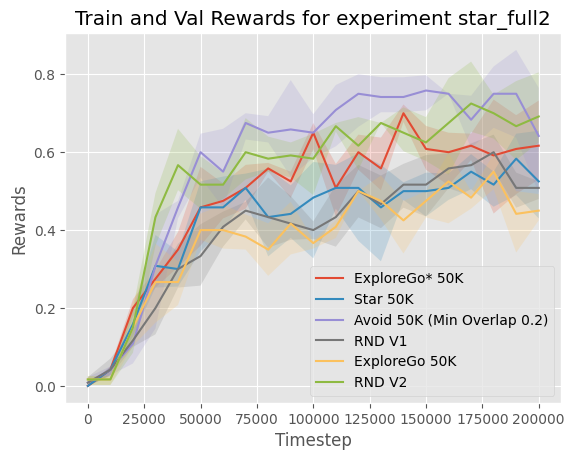

In [16]:
with open(f'action_values/star_50k.pl', 'rb') as file:
    star = dill.load(file)
    assert len(star) >= 50000
    print(f'Star Uniqueness: {star.ratio_unique_trans}')
    
with open(f'action_values/explorego_star_50k.pl', 'rb') as file:
    explore_go_star = dill.load(file)
    assert len(explore_go_star) >= 50000
    print(f'ExploreGo* Uniqueness: {explore_go_star.ratio_unique_trans}')
    
with open(f'action_values/explorego_50k.pl', 'rb') as file:
    explore = dill.load(file)
    assert len(explore) >= 50000
    print(f'ExploreGo Uniqueness: {explore.ratio_unique_trans}')
    
with open(f'action_values/avoid_50k_02.pl', 'rb') as file:
    avoid_02 = dill.load(file)
    assert len(avoid_02) >= 50000
    print(f'Avoid (0.2) Uniqueness: {avoid_02.ratio_unique_trans}')
    
with open(f'action_values/rnd_50k_v1.pl', 'rb') as file:
    rnd1 = dill.load(file)
    assert len(rnd1) >= 50000
    print(f'RND V1 Uniqueness: {rnd1.ratio_unique_trans}')
    
with open(f'action_values/rnd_50k_v2.pl', 'rb') as file:
    rnd2 = dill.load(file)
    assert len(rnd2) >= 50000
    print(f'RND V2 Uniqueness: {rnd2.ratio_unique_trans}')

avoid_vs_explorego = Experiment(
    'star_full2', 
    seeds=[0, 1, 2],
    timesteps=int(2e5), 
    val_freq=int(1e4),
    batch_size=64
)

avoid_vs_explorego.run_experiment([explore_go_star, star, avoid_02, rnd1, explore, rnd2], 
                               ['ExploreGo* 50K', 'Star 50K', 'Avoid 50K (Min Overlap 0.2)', 'RND V1', 'ExploreGo 50K', 'RND V2'])


Star Uniqueness: 0.316669582823006
ExploreGo* Uniqueness: 0.33429985502174675
ExploreGo Uniqueness: 0.2565236952609478
Avoid (0.2) Uniqueness: 0.7999900001249984
RND V1 Uniqueness: 0.5837187210959178
RND V2 Uniqueness: 0.7482906463669204
RUNNING EXPERIMENT star_full3 ON DEVICE: cuda
=============Seed 0===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.825 | Hours left: 0.0ft: 0.0ours left: 0.0

=============Seed 1===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.800 | Hours left: 0.0ft: 0.0ours left: 0.0

=============Seed 2===============

For dataset: RND V2 || Step: 200000 / 200000 | Loss: 0.000 | Val Rewards: 0.725 | Hours left: 0.0ft: 0.0ours left: 0.0

Dataset: ExploreGo* 80K | Test results: 0.7833
Dataset: Star 80K | Test results: 0.7817
Dataset: Avoid 80K (Min Overlap 0.2) | Test results: 0.9150
Dataset: RND V1 | Test results: 0.7383
Dataset: ExploreGo 80K | Test results: 0.6867
Dataset: RND V2

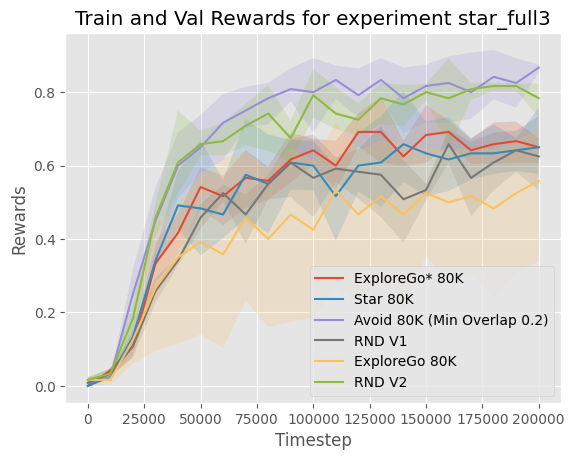

In [17]:
with open(f'action_values/star_80k.pl', 'rb') as file:
    star = dill.load(file)
    assert len(star) >= 80000
    print(f'Star Uniqueness: {star.ratio_unique_trans}')
    
with open(f'action_values/explorego_star_80k.pl', 'rb') as file:
    explore_go_star = dill.load(file)
    assert len(explore_go_star) >= 80000
    print(f'ExploreGo* Uniqueness: {explore_go_star.ratio_unique_trans}')
    
with open(f'action_values/explorego_80k.pl', 'rb') as file:
    explore = dill.load(file)
    assert len(explore) >= 80000
    print(f'ExploreGo Uniqueness: {explore.ratio_unique_trans}')
    
with open(f'action_values/avoid_80k_02.pl', 'rb') as file:
    avoid_02 = dill.load(file)
    assert len(avoid_02) >= 80000
    print(f'Avoid (0.2) Uniqueness: {avoid_02.ratio_unique_trans}')
    
with open(f'action_values/rnd_80k_v1.pl', 'rb') as file:
    rnd1 = dill.load(file)
    assert len(rnd1) >= 80000
    print(f'RND V1 Uniqueness: {rnd1.ratio_unique_trans}')
    
with open(f'action_values/rnd_80k_v2.pl', 'rb') as file:
    rnd2 = dill.load(file)
    assert len(rnd2) >= 80000
    print(f'RND V2 Uniqueness: {rnd2.ratio_unique_trans}')

avoid_vs_explorego = Experiment(
    'star_full3', 
    seeds=[0, 1, 2],
    timesteps=int(2e5), 
    val_freq=int(1e4),
    batch_size=64
)

avoid_vs_explorego.run_experiment([explore_go_star, star, avoid_02, rnd1, explore, rnd2], 
                               ['ExploreGo* 80K', 'Star 80K', 'Avoid 80K (Min Overlap 0.2)', 'RND V1', 'ExploreGo 80K', 'RND V2'])
